# AutoEncoders on Image Data

## The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

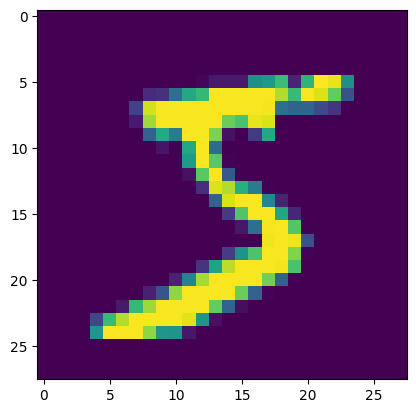

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [16]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [17]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [18]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [19]:
autoencoder.fit(X_train, 
                X_train, 
                epochs=5,
               validation_data=(X_test, X_test) )

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2515 - accuracy: 0.0832 - val_loss: 0.2181 - val_accuracy: 0.1170
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1906 - accuracy: 0.1556 - val_loss: 0.1672 - val_accuracy: 0.1823
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1630 - accuracy: 0.1930 - val_loss: 0.1603 - val_accuracy: 0.1931
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1509 - accuracy: 0.2124 - val_loss: 0.1446 - val_accuracy: 0.2213
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1433 - accuracy: 0.2236 - val_loss: 0.1397 - val_accuracy: 0.2275


In [20]:
passed_images = autoencoder.predict(X_test[:10])

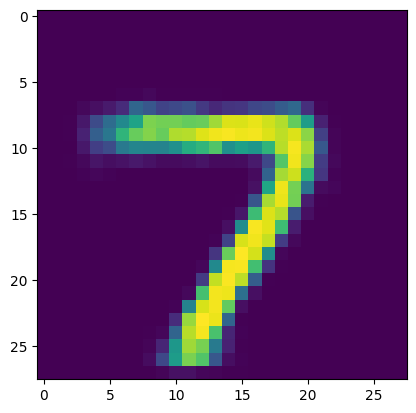

In [21]:
plt.imshow(passed_images[0])

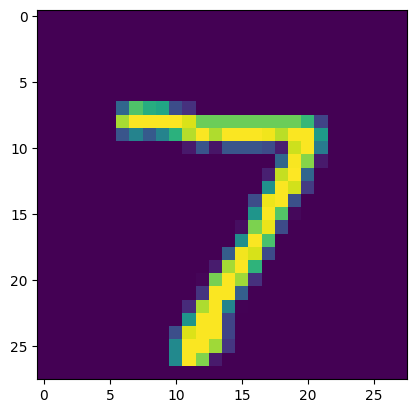

In [22]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [23]:
from tensorflow.keras.layers import GaussianNoise

In [24]:
sample = GaussianNoise(0.2)

In [25]:
noisey = sample(X_test[0:2],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



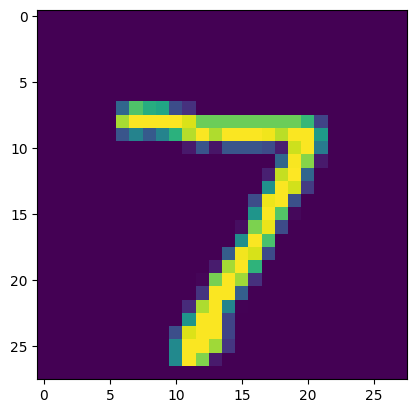

In [26]:
plt.imshow(X_test[0])

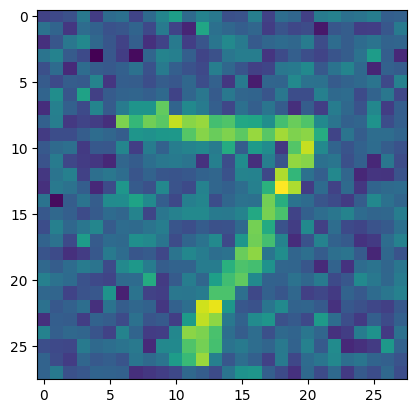

In [27]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
# TO create the exact same noise
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [30]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [31]:
noise_remover = Sequential([encoder, decoder])

In [32]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [34]:
noise_remover.fit(X_train, 
                  X_train, 
                  epochs=8,
                  validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1691 - accuracy: 0.1827 - val_loss: 0.1345 - val_accuracy: 0.2200
Epoch 2/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1292 - accuracy: 0.2319 - val_loss: 0.1192 - val_accuracy: 0.2464
Epoch 3/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1201 - accuracy: 0.2469 - val_loss: 0.1130 - val_accuracy: 0.2572
Epoch 4/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1146 - accuracy: 0.2580 - val_loss: 0.1079 - val_accuracy: 0.2687
Epoch 5/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1112 - accuracy: 0.2644 - val_loss: 0.1059 - val_accuracy: 0.2709
Epoch 6/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1084 - accuracy: 0.2695 - val_loss: 0.1057 - val_accuracy: 0.2730
Epoch 7/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1062 - accuracy: 0.2737 - val_loss: 0.1020 - val_accuracy:

In [35]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


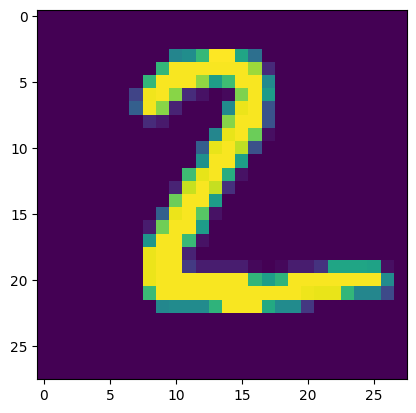

The Noisey Version


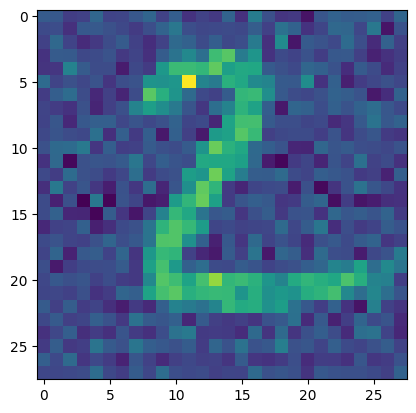

After going through denoiser


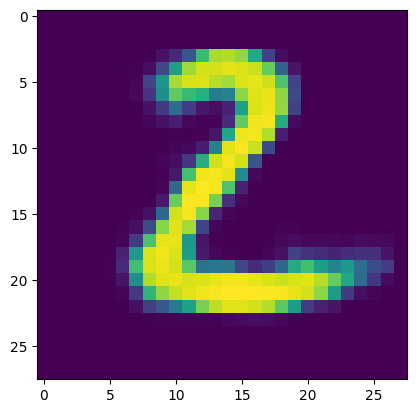

In [36]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()